




## <font color='blue'>Engenharia de Atributos Para E-Commerce Analytics</font>



- Análise Exploratória de Dados
    - EDA Parte 1
    - EDA Parte 2
- **Engenharia de Atributos**
- Pré-Processamento de Dados

A Engenharia de Atributos refere-se ao processo de usar o conhecimento do domínio (área de negócio) para remover, selecionar e transformar os dados, mantendo somente os atributos mais relevantes.

![title](imagens/EstudoCaso4.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [1]:
# Imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats#PACOTE PARA FUNÇÃO MATEMATICA

In [124]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "CLauder - Noronha" --iversions

Author: CLauder - Noronha

matplotlib: 3.2.2
numpy     : 1.19.5
pandas    : 1.3.5
seaborn   : 0.10.1
scipy     : 1.7.3



## Carregando o Dataset

In [2]:
# Carrega o dataset
df = pd.read_csv('dados/dataset.csv')

## Analise Exploratoria dos Dados 

In [3]:
df.shape

(11000, 12)

In [4]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [7]:
# Variáveis numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'compras_anteriores', 
        'desconto', 
        'custo_produto', 
        'peso_gramas']

In [8]:
# Variáveis categóricas
cats = ['modo_envio', 
        'prioridade_produto', 
        'genero',
        'corredor_armazem']

In [9]:
# Variável target
target = ['entregue_no_prazo'] 

In [10]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,3.567727,13.372545,210.200909,3633.844455
std,1.141438,1.413570,1.522852,16.204943,48.062985,1635.402722
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000


In [11]:
df[cats].describe()

,modo_envio,prioridade_produto,genero,corredor_armazem
count,11000,11000,11000,11000
unique,3,3,2,5
top,Navio,baixa,F,F
freq,7463,5298,5546,3666


In [12]:
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
dtype: int64

## Limpeza de Dados

### Tratamento de Valores Ausentes

**ATENÇÃO**: Valor ausente significa ausência de informação e não ausência de dado!

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. Mas fique atento: a Engenharia de Atributos e o Pré-Processamento podem gerar valores ausentes, o que precisa ser tratado.

In [13]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [14]:
# Verifica se há valores ausentes
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

### Tratamento de Valores Duplicados

Valores duplicados significam duplicidade dos dados em toda a linha (todo o registro).

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos.

In [15]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [16]:
# Verifica se há valores duplicados
df.duplicated().sum()

0

### Tratamento de Valores Outliers

Leia o manual em pdf com a definição do que é o z-score e a definição de valor outlier.

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. 


Antes vamos saber o comprimento dos dados com o LEN 

In [17]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 11000


In [18]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
0,4,2,3,44,177,1233
1,4,5,2,59,216,3088
2,2,2,4,48,183,3374
3,3,3,4,10,176,1177
4,2,2,3,46,184,2484


Vamos calcular a média e o desvio padrão. Vamos escolher a coluna desconto. 


In [19]:
df.desconto.mean()

13.372545454545454

In [20]:
df.desconto.std()

16.20494287359407

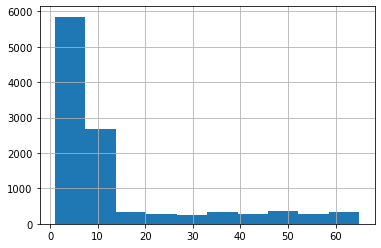

In [21]:
df.desconto.hist();

Temos Outliers em nossa base de dados. Analisando o grafico tivemos um desconto abaixo da média. 

In [22]:
# Calcula os limites superior e inferior
# Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior
limite_superior = df.desconto.mean() + 3 * df.desconto.std()
print("Valor superior:", limite_superior)
limite_inferior = df.desconto.mean() - 3 * df.desconto.std()
print("Valor inferior:", limite_inferior)

Valor superior: 61.987374075327665
Valor inferior: -35.24228316623676


In [23]:
# Extra os registros com outliers na coluna desconto
# Fatiar utilizando o PANDAS


df_outliers_desconto = df[(df.desconto <= limite_inferior) | (df.desconto >= limite_superior)]
df_outliers_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [24]:
Teve um desconto muito acima da média 

SyntaxError: invalid syntax (<ipython-input-24-0f66bef218c2>, line 1)

In [25]:
#Remover todos os OUTLIERS da coluna Desconto.


# Filtra o dataframe removendo os registros com outliers na coluna desconto
df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [26]:
#Mostar a quantidade de linhas sem os Outliers.

print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 10819


CRIAR  UMA FUNÇÃO LOOP PARA TRATAR TODOS OS Outliers.



In [27]:


registros = np.array([True] * len(df))

In [28]:
type(registros)

numpy.ndarray

In [29]:
np.count_nonzero(registros == True)

10819

In [30]:
np.count_nonzero(registros == False)

0

In [31]:



# Variáveis numéricas (sem a variável desconto)
nums2 = ['numero_chamadas_cliente', 
         'avaliacao_cliente', 
         'compras_anteriores', 
         'custo_produto', 
         'peso_gramas']

In [32]:
# Loop por cada variável numérica
for col in nums2:
    
    # Calcula o z-score absoluto
    zscore = abs(stats.zscore(df[col])) 
    
    # Mantém valores com menos de 3 z-score absoluto
    registros = (zscore < 3) & registros

In [33]:
np.count_nonzero(registros == True)


#Sobrou 10643 linhas, tiramos os outliers

10643

In [34]:
np.count_nonzero(registros == False)

176

In [35]:
# Removemos registros com o z-score abaixo de 3 nas colunas numéricas
#Filtrando o registro

df = df[registros] 

In [36]:
print(f'Número de linhas após filtrar valores extremos (outliers): {len(df)}')

Número de linhas após filtrar valores extremos (outliers): 10643


### Tratamento de Desbalanceamento de Classe

Deve ser feito nos dados de treino, após o pré-processamento dos dados.

In [37]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [38]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

------------------------------------------------------------------------------

## Engenharia de Atributos

## Feature Selection 

Aqui tomamos as decisões sobre quais variáveis serão usadas na Engenharia de Atributos.



A  seleção  de  recursos(feature  selection)é  o  processo  de  isolar  os  recursos  mais consistentes,  não  redundantes  e  relevantes  a  serem  usados na  construção  de  ummodelo. Reduzir metodicamente o tamanho dos conjuntos de dados é importante, pois o tamanho e a variedade  dos  conjuntos  de  dados  continuam  a  crescer.  

O  principal  objetivo  da  seleção  de recursos é melhorar o desempenho de um modelo preditivo e reduzir o custo computacional da modelagem.A seleção de recursos, um dos principais componentes da engenharia de recursos, é o processo  de  seleção  dos  recursos  mais  importantes  a  serem  inseridos  em  algoritmos  de aprendizado de máquina. Técnicas de seleção de recursos são empregadas para reduzir o número de  variáveis de  entrada,  eliminando  recursos  redundantes  ou  irrelevantes  e  estreitando  o conjunto de recursos para aqueles mais relevantes para o modelo de aprendizado de máquina.

Os principais benefícios de realizar a seleção de recursos com antecedência, em vez de deixar o modelo de aprendizado de máquina descobrir quais recursos são mais importantes, incluem:

•Modelos mais simples: modelos simples são fáceis de explicar -um modelo muito complexo e inexplicável não é valioso.

•Tempos  de  treinamento  mais  curtos:  um  subconjunto  mais  preciso  de  recursos diminui a quantidade de tempo necessária para treinar um modelo.

•Redução de variância: aumentaa precisão das estimativas que podem ser obtidas para uma determinada simulação

•Evitar a “maldição”da alta dimensionalidade:à medida que a dimensionalidade e o número de recursos aumentam, o volume de espaço aumenta tão rapidamente que os dados disponíveis se tornam limitados. Selecionar e reduzir o número de recursos evita que não tenhamos dados suficientes para o treinamento o modelo.














In [39]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [40]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10560,10561,D,Aviao,3,4,216,3,baixa,F,3,5817,0
3447,3448,B,Navio,4,2,161,3,baixa,F,4,5947,0
10190,10191,A,Navio,5,5,235,5,baixa,M,8,1332,1
299,300,F,Navio,4,3,136,3,media,M,20,1531,1
4359,4360,B,Caminhao,5,1,236,2,baixa,F,2,4987,1


In [41]:
# Correlação
df.corr()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


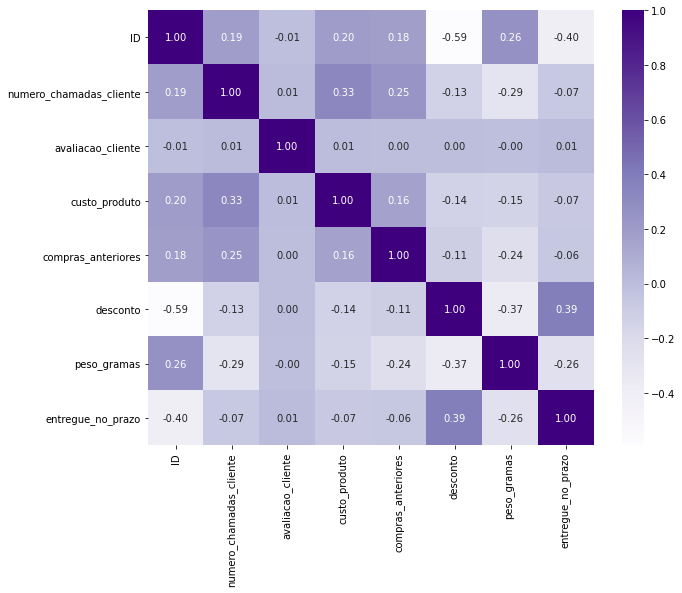

In [42]:
# Mapa de correlação 
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

**Decisão**: Na figura acima, os recursos que ultrapassaram o limite (+/- 0,05) na correlação com o recurso de destino (entregue_no_prazo) serão escolhidos para serem processados na Engenharia de Atributos, nesse caso: numero_chamadas_cliente, custo_produto, compras_anteriores, desconto e peso_gramas.

A variável avaliacao_cliente não parece relevante e não será processada na Engenharia de Atributos. A variável ID será descartada, pois não representa informação útil.

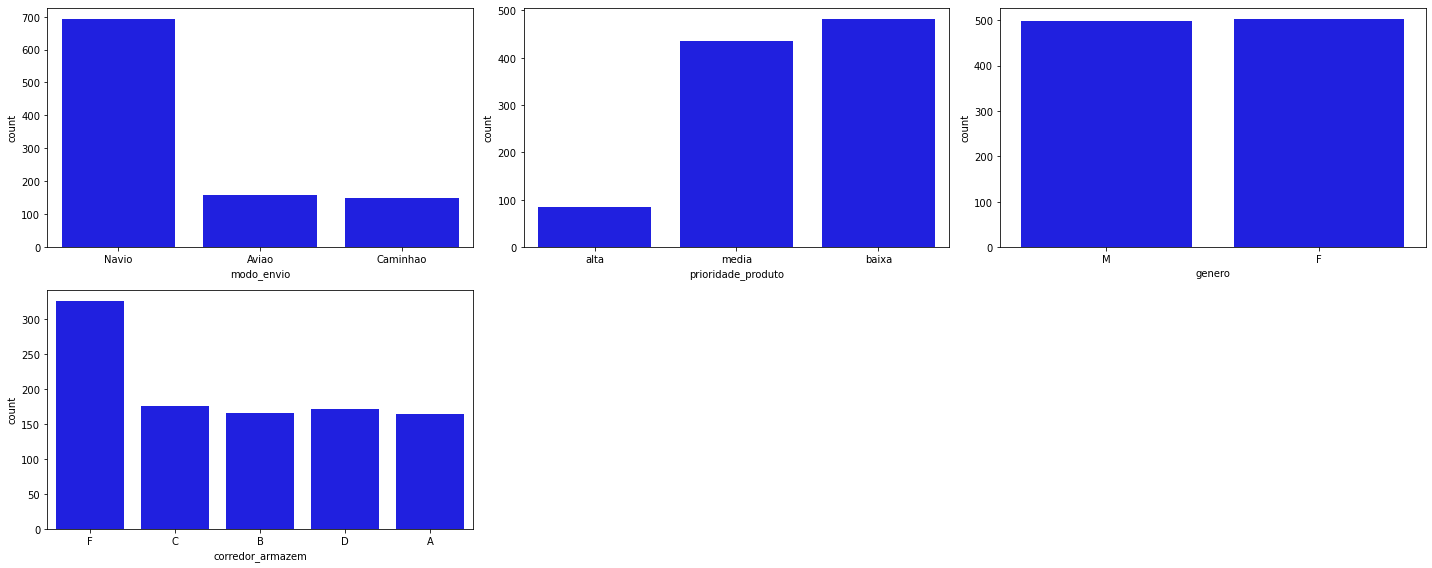

In [43]:
# Gráfico de barras
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20,8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão**: Na figura acima pode-se ver que todas as variáveis categóricas têm uma diferença bastante grande em termos de contagens das classes, exceto a variável de Gênero. Sendo assim, não vamos considerar a variável genero na Engenharia de Atributos.

**Obs: Como as tarefas a seguir são complexas, demonstraremos apenas como algumas colunas. Fique à vontade para refazer a Engenharia de Atributos usando todas as colunas selecionadas conforme regras definidas acima.**

-------------------------------------------------------------------------------

## Feature Extraction 

Aqui fazemos a extração de novas variáveis a partir da informação contida em outras variáveis.


A  extração  de  recursos(feature  extraction)é  um processo  de  redução  de dimensionalidaderealizado dentro da Engenharia de Atributos, no qual um conjunto inicial de dados  brutos  é  dividido  e  reduzido  a  grupos  mais  gerenciáveis.  

Então,  quando  você  quiser processar, será mais fácil. A característica mais importante degrandes conjuntos de dados é que eles possuem um grande número de variáveis. 

Essas variáveis exigem muitos recursos de computação para serem processadas. Portanto, a extração de recursos ajuda a obter o melhor recurso desses conjuntos selecionando e combinando variáveis em recursos, reduzindo efetivamente a quantidade de dadose permitindocompreender os dados por diferentes perspectivas. 

Esses recursos são fáceis de  processar, eainda  são  capazes  de  descrever  o  conjunto  de  dados  real  com  precisão  e originalidade.

Existem diversas maneiras de realizar feature extractione no Estudo de Caso usaremos uma abordagem baseada na compreensão do problema de negócio.

In [44]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [45]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [46]:
# Cria uma cópia do dataframe
df_eng = df.copy()


#é bom criar caso surge algum erro, recomendavel.

In [47]:
df_eng.shape

(10643, 12)

In [70]:
df_eng.dtypes

ID                               int64
corredor_armazem                object
modo_envio                      object
numero_chamadas_cliente          int64
avaliacao_cliente                int64
custo_produto                    int64
compras_anteriores               int64
prioridade_produto              object
genero                          object
desconto                         int64
peso_gramas                      int64
entregue_no_prazo                int64
performance_prioridade_envio    object
dtype: object

### 1- Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [71]:
df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [72]:
# Criamos a variável e preenchemos com nan
df_eng['performance_prioridade_envio'] = np.nan

In [73]:
# ATENÇÃO!!!! Apenas para compreender o conceito!!!
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Ruim", "Excelente")

In [74]:
df_eng['performance_prioridade_envio'].value_counts()

Excelente    10333
Ruim           310
Name: performance_prioridade_envio, dtype: int64

In [75]:
# Limpamos todos os valores da variável
df_eng['performance_prioridade_envio'] = np.nan

In [76]:
# Agora sim a solução!!!
df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável", 
    "Não Houve Atraso")))

In [77]:
df_eng['performance_prioridade_envio'].value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [78]:
#Foi crianda uma nova variavel.

df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
9780,9781,D,Navio,5,3,223,3,baixa,F,2,4671,1,Não Houve Atraso
6953,6954,F,Navio,3,1,207,2,baixa,F,7,5596,0,Atraso Tolerável
9552,9553,D,Navio,6,1,276,2,baixa,M,10,5108,0,Atraso Tolerável
5527,5528,F,Navio,4,2,253,5,baixa,M,5,1812,0,Atraso Tolerável
9024,9025,D,Caminhao,4,2,253,5,baixa,F,3,4676,1,Não Houve Atraso


In [79]:
# Agrupamos os dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [80]:
# Ajustamos os nomes das colunas
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [81]:
# Pivot(transformar linhas em colunas ou colunas em linhas)
df_report1 = pd.pivot_table(df_report1,
                             index = 'performance_prioridade_envio',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [82]:
# Novo ajuste nos nomes das colunas
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [83]:
# Replace do valor nan por zero(colocar o número 0 nos NANs)
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [84]:
# Concatena colunas criando uma terceira variável
df_report1["Total"] = df_report1["Total Atraso"] + df_report1["Total no Prazo"]
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico,310.0,0.0,310.0
1,Atraso Problemático,1917.0,0.0,1917.0
2,Atraso Tolerável,2134.0,0.0,2134.0
3,Não Houve Atraso,0.0,6282.0,6282.0


In [85]:
# Não precisamos mais das colunas usadas na concatenação. Vamos removê-las.
df_report1.drop(df_report1.columns[[1, 2]], axis = 1, inplace = True)
df_report1.head()

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


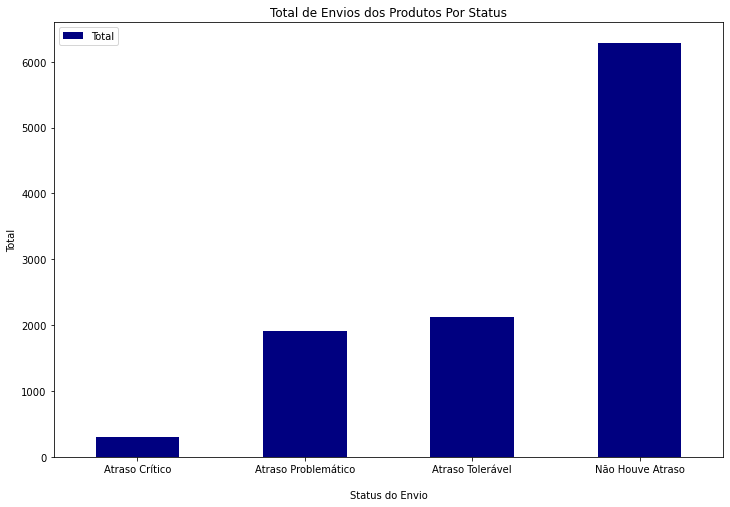

In [86]:
# Plot
df_report1.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'jet',
                figsize=(12,8))
plt.xticks(rotation = 0)
plt.show()

### 2- Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio

O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é crítico por Navio.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é problemático por Navio.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é tolerável por Navio.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é crítico por Aviao.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é problemático por Aviao.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é tolerável por Aviao.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é crítico por Caminhao.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é problemático por Caminhao.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é tolerável por Caminhao.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [87]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [88]:
df_eng.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [90]:
# Solução
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Navio",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Aviao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Caminhao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Caminhao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Caminhao", 
    "Não Houve Atraso")))))))))

In [70]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
204,205,D,Navio,2,5,155,3,baixa,M,23,1602,1,Não Houve Atraso,Não Houve Atraso
868,869,C,Navio,3,1,218,3,baixa,M,4,2304,1,Não Houve Atraso,Não Houve Atraso
1454,1455,A,Navio,3,5,230,2,baixa,M,27,3840,1,Não Houve Atraso,Não Houve Atraso
5138,5139,A,Navio,4,2,136,2,media,F,7,4305,1,Não Houve Atraso,Não Houve Atraso
6323,6324,F,Navio,3,1,233,3,baixa,F,7,4874,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio


In [92]:
df_eng.performance_modo_envio.value_counts()

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [93]:
# Agrupamos os dados para análise
df_report2 = df_eng.groupby(['performance_modo_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453


In [94]:
df_report2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453
9,Não Houve Atraso,1,6282


In [95]:
# Pivot
df_report2 = pd.pivot_table(df_report2,
                            index = 'performance_modo_envio',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report2.head(10)

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [96]:
df_report2.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [97]:
# Replace do valor nan por zero
df_report2['Total Atraso'] = df_report2['Total Atraso'].replace(np.nan, 0)
df_report2['Total no Prazo'] = df_report2['Total no Prazo'].replace(np.nan, 0)
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0
9,Não Houve Atraso,0.0,6282.0


In [98]:
# Concatena colunas criando uma terceira variável
df_report2["Total"] = df_report2["Total Atraso"] + df_report2["Total no Prazo"]
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0,51.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0,1453.0
9,Não Houve Atraso,0.0,6282.0,6282.0


In [99]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report2.drop(df_report2.columns[[1, 2]], axis = 1, inplace = True)
df_report2.head(10)

,Status do Envio,Total
0,Atraso Crítico na Entrega Por Aviao,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0
2,Atraso Crítico na Entrega Por Navio,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0
9,Não Houve Atraso,6282.0


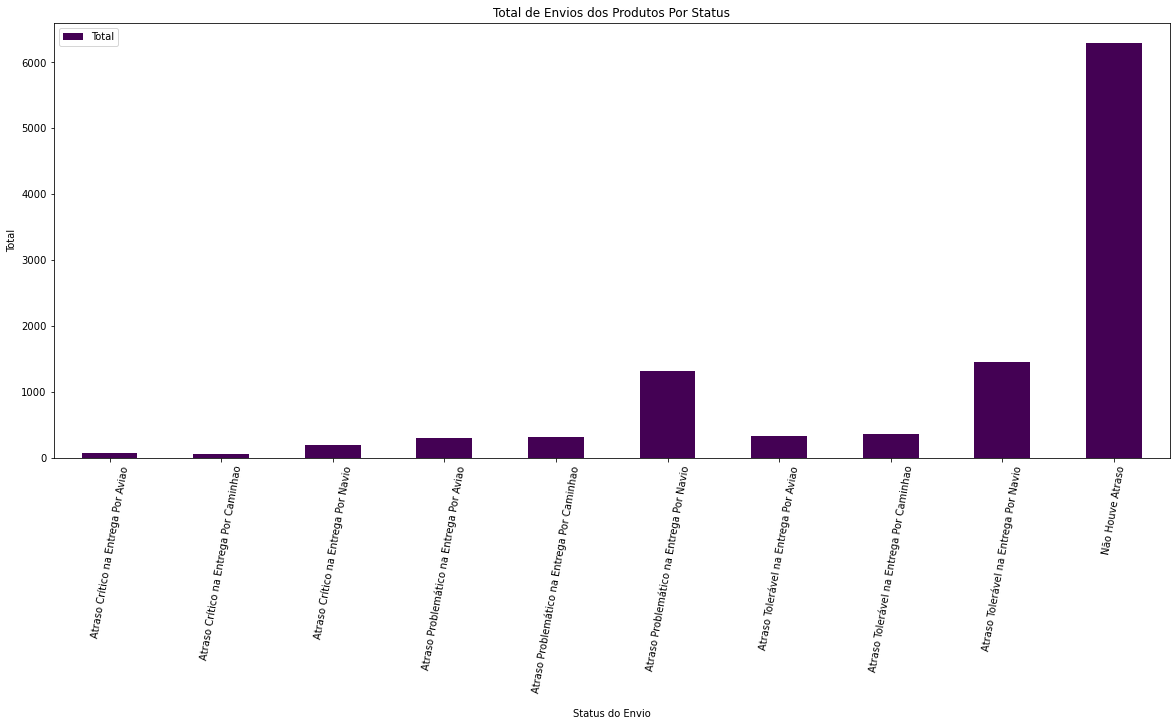

In [100]:
# Plot
df_report2.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'viridis',
                figsize = (20,8))
plt.xticks(rotation = 80)
plt.show()

### 3- Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

Criaremos duas novas variáveis com base na seguinte regra de negócio:

**Variável 1 - faixa_desconto**

- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - performance_faixa_desconto**

- Se a faixa de desconto foi acima ou igual à média e houve atraso na entrega = "Atraso na Entrega com Desconto Acima da Média"

- Se a faixa de desconto foi acima ou igual à e não houve atraso na entrega = "Entrega no Prazo com Desconto Acima da Média"

- Se a faixa de desconto foi abaixo da média e houve atraso na entrega = "Atraso na Entrega com Desconto Abaixo da Média"

- Se a faixa de desconto foi abaixo da média e não houve atraso na entrega = "Entrega no Prazo com Desconto Abaixo da Média"

In [101]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
9223,9224,F,Navio,4,5,141,2,baixa,F,10,5907,1,Não Houve Atraso,Não Houve Atraso
8063,8064,F,Caminhao,3,2,235,2,media,F,10,4172,0,Atraso Problemático,Atraso Problemático na Entrega Por Caminhao
5590,5591,C,Caminhao,5,5,195,4,media,M,1,4482,0,Atraso Problemático,Atraso Problemático na Entrega Por Caminhao
3396,3397,D,Navio,2,4,172,5,baixa,M,4,4668,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio
8158,8159,C,Navio,3,2,227,3,media,M,6,5058,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio


In [102]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio'],
      dtype='object')

In [103]:
df_eng.desconto.describe()

count    10643.000000
mean        12.528047
std         14.991968
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: desconto, dtype: float64

In [107]:
# Variável 1
df_eng['faixa_desconto'] = np.where(df_eng.desconto >= 12, "Desconto Acima da Media", "Desconto Abaixo da Media") 

In [108]:
df_eng['faixa_desconto'].value_counts()

Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: faixa_desconto, dtype: int64

In [109]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto
178,179,C,Navio,3,3,192,3,media,F,2,3995,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media
2024,2025,A,Navio,3,4,210,3,baixa,F,7,2878,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media
6865,6866,F,Aviao,6,3,266,4,baixa,F,9,1876,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Aviao,Desconto Abaixo da Media
3510,3511,D,Navio,6,3,121,3,media,F,10,5208,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media
3710,3711,A,Aviao,2,3,237,3,media,M,2,5331,0,Atraso Problemático,Atraso Problemático na Entrega Por Aviao,Desconto Abaixo da Media


In [110]:
# Variável 2
df_eng['performance_faixa_desconto'] = np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Acima da Media", 
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Abaixo da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Acima da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Abaixo da Media",
   "NA"))))

In [111]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
891,892,B,Navio,3,4,255,4,baixa,F,12,2266,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
5929,5930,F,Navio,4,4,138,5,baixa,M,10,5401,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
2743,2744,F,Aviao,4,3,132,4,media,M,10,1767,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
5412,5413,D,Navio,3,2,177,4,baixa,F,3,5527,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
6637,6638,F,Navio,3,4,153,4,baixa,M,5,5604,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media


In [112]:
df_eng['performance_faixa_desconto'].value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [113]:
# Agrupamos os dados para análise
df_report3 = df_eng.groupby(['performance_faixa_desconto', 
                             'entregue_no_prazo']).agg({'ID': ['count']}).reset_index()
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,ID
,,,count
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [114]:
df_report3.columns = ['performance_faixa_desconto', 'entregue_no_prazo', 'contagem']
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,contagem
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [115]:
# Pivot
df_report3 = pd.pivot_table(df_report3,
                             index = 'performance_faixa_desconto',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report3.head()

entregue_no_prazo,performance_faixa_desconto,0,1
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [116]:
df_report3.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [117]:
# Replace do valor nan por zero
df_report3['Total Atraso'] = df_report3['Total Atraso'].replace(np.nan, 0)
df_report3['Total no Prazo'] = df_report3['Total no Prazo'].replace(np.nan, 0)
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0


In [118]:
# Concatena colunas criando uma terceira variável
df_report3["Total"] = df_report3["Total Atraso"] + df_report3["Total no Prazo"]
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0,2374.0


In [119]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report3.drop(df_report3.columns[[1, 2]], axis = 1, inplace = True)
df_report3.head()

,Status do Envio,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,3908.0
2,Entrega no Prazo com Desconto Acima da Media,2374.0


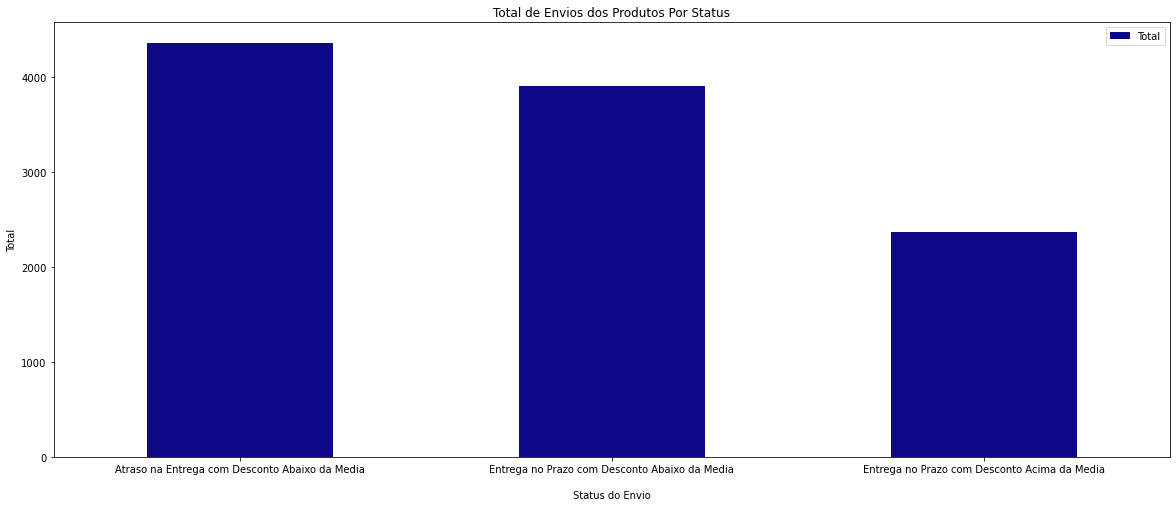

In [120]:
# Plot
df_report3.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'plasma',
                figsize = (20,8))
plt.xticks(rotation = 0)
plt.show()

In [121]:
df_eng.sample(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
9925,9926,F,Navio,6,3,247,4,media,M,7,1626,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
6427,6428,F,Caminhao,3,5,172,3,media,M,1,5024,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4783,4784,F,Caminhao,3,1,221,2,baixa,F,7,5320,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Caminhao,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
1228,1229,C,Aviao,6,1,136,3,alta,M,12,1592,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2000,2001,A,Navio,4,3,135,3,media,F,11,1322,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
8413,8414,F,Navio,4,3,257,3,baixa,M,8,4447,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
8037,8038,B,Navio,4,2,250,5,media,M,10,1026,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
2147,2148,F,Navio,3,4,150,3,media,M,47,1511,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
5163,5164,B,Navio,4,5,154,3,media,F,9,5489,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
151,152,F,Aviao,5,3,98,5,media,M,44,1269,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [123]:
# Salva o dataframe
df_eng.to_csv('dados/df_eng.csv', sep = ',', encoding = 'utf-8')

#Salvar o Dataset limpo.